<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

# Основные понятия статистики



Возьмем данные о фильмах с контентом на английском языке. 

In [2]:
url="FilmTV_dataset.csv"
df=pd.read_csv(url)

*   **filmtv_ID** FilmTV ID
*   **film_title** Movie Title
*   **year** Year of Release
*   **genre** Movie Genre
*   **duration** Movie Duration
*   **country** Movie Country
*   **director** Movie Director
*   **actors** Movie Actors
*   **avg_vote** Movie Average Vote
*   **votes** Movie Number of Votes


Посмотрим основные колонки из таблицы

In [4]:
df.head()

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,28
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",7.0,3
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,10
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin",7.1,14
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,12


# Математические ожидание и среднее значение

**Выборка** - некоторая случайная величина. В данном контексте возьмем duration - сколько идет фильм в секундах. Вторую выборку возьмём как avg_vote.
Построим точечный график двух выборок.

<AxesSubplot:xlabel='duration', ylabel='votes'>

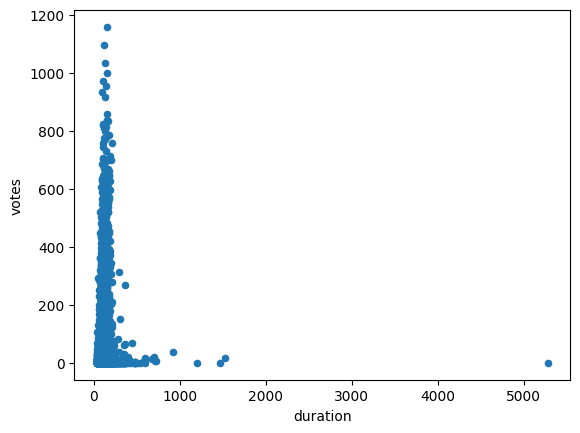

In [10]:
df[['duration', 'votes']].plot(kind='scatter', x= 'duration', y='votes')

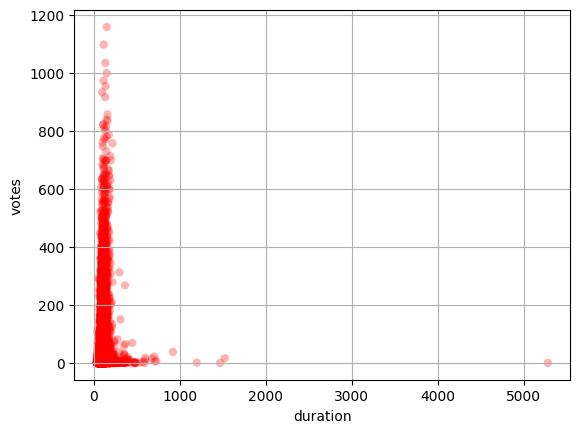

In [3]:
duration = df['duration']
votes = df['votes']
fig, ax = plt.subplots()
ax.scatter(duration, votes, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('votes')
plt.show()

In [24]:
statistics.mode(df.duration)

90

In [25]:
df.duration.std()

34.95897708018442

Рассмотрим выборку duration - сколько длится фильм по времени.

Складываем все значения выборки и делим на количество элементов в выборке

In [48]:
statistics.mean(df['duration'])

99.12066686564619

In [49]:
sum(df['duration'])/len(df['duration'])

99.12066686564619

# Медиана

Возьмем колонку Duration - продолжительность фильма - и посчитаем медиану. **Медиана** - это такое значение, что ровно половина выборки меньше него, а ровно половина - больше. 

1ый способ:

In [50]:
# Извлекаем duration 
duration = df['duration']

# Находим их количество
num_duration = len(duration)

# Сортируем в порядке возрастания
sorted_duration = sorted(duration)

# Ищем индекс среднего элемента
# если количество элементов четное, то берем среднее двух элементов в середине
middle = (num_duration // 2)
if num_duration%2==0:
  result = (sorted_duration[middle-1] + sorted_duration[middle])/2
else:
  result = sorted_duration[middle]
# Находим медиану
print('Медиана: ', result)

Медиана:  95.0


In [51]:
len(sorted_duration)

46906

2ой способ:

In [52]:
import statistics
print('Медиана: ', statistics.median(df['duration']))

Медиана:  95.0


# Мода

Мода - значение, которое наиболее часто встречается в выборке

In [53]:
# Создаём пустой словарь, в котором будем считать количество появлений значений продолжительности фильма
duration_counts = {}
for p in duration:
    if p not in duration_counts:
        duration_counts[p] = 1
    else:
        duration_counts[p] += 1

# Проходимся по словарю и ищем максимальное количество повторений
# Алгоритм поиска максимума
maxp = 0
mode_duration = None
for k, v in duration_counts.items():
    if maxp < v:
        maxp = v
        mode_duration = k
print('Значение моды: ', mode_duration, 'Количество встречаемости: ', maxp)


Значение моды:  90 Количество встречаемости:  5511


In [54]:
print('Значение моды: ', statistics.mode(duration))

Значение моды:  90


In [26]:
duration = df.duration

In [4]:
df.head()

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,28
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",7.0,3
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,10
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin",7.1,14
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,12


# Минимум и максимум

In [23]:
min(duration)

40

In [24]:
max(duration)

5280

In [29]:
duration.isnull().sum()

0

# Выбросы

В табличных данных выбросы - либо переменной нет в таблице, либо значение слишком варьируется от среднего значения выборки.

**Выбросы** - отсутствующих значений в данной колонке нет

In [25]:
duration.isnull().sum()

0

<AxesSubplot:>

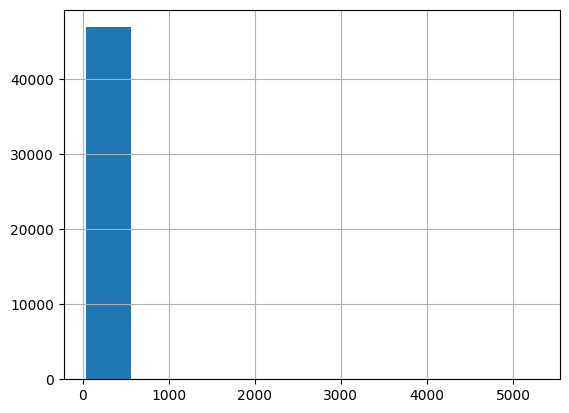

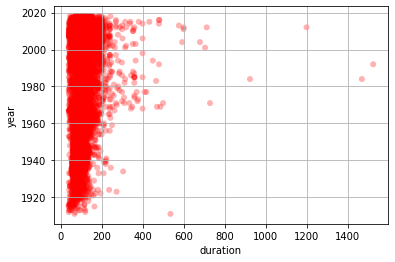

In [67]:
duration = df['duration']
year = df['year']
fig, ax = plt.subplots()
ax.scatter(duration, year, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('year')
plt.show()

По графику можно увидеть, что есть некое значение, выходящее за рамки всех остальных значений. Найдем его.

In [61]:
duration[duration>600]

23844     924
23845    1525
23846     729
24019     680
27462    1470
39271     713
41240    1200
42871     705
Name: duration, dtype: int64

Удалим эти значения, считая их выбросами.

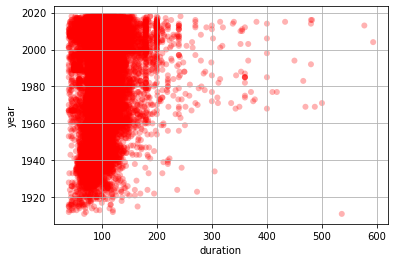

In [66]:
duration_new = duration[duration<600]
year_new = year[duration<600]

fig, ax = plt.subplots()
ax.scatter(duration_new, year_new, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('year')
plt.show()

<AxesSubplot:xlabel='duration', ylabel='year'>

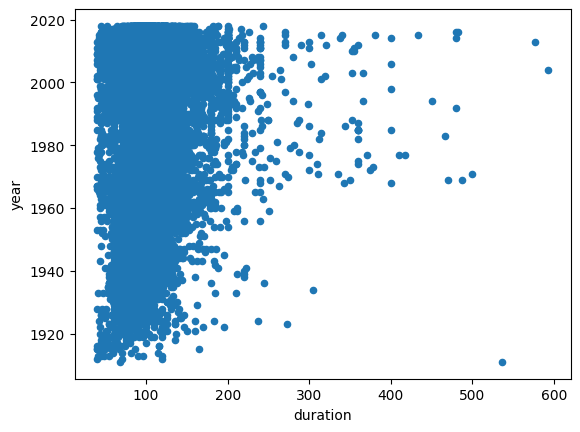

In [6]:
df[df.duration < 600].plot(kind='scatter', x='duration', y='year')

Можно заметить, что картина стала более ясная после удаления выбросов.

Есть отсутствующие значения в колонке actors

In [68]:
df['actors'].isnull().sum()

129

# Стандартное отклонение

Мера разброса данных (насколько данные варьируются от среднего значения) - корень среднего квадратичного отклонения.

1ой метод:

In [33]:
statistics.pstdev(duration)

34.95860443683266

In [36]:
statistics.stdev(duration)


34.958977080184425

In [45]:

import pandas.core.generic
pandas.core.generic.

In [ ]:
?duration.var

2ой метод:

In [33]:
def stdev(nums):
    diffs = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**(2)
    return (diffs/(len(nums)-1))**(0.5)

print(stdev(duration))

34.9589770801773


# Дисперсия

Дисперсия - квадрат стандартного отклонения

In [34]:
statistics.pvariance(duration)

1222.1040241709359

In [35]:
34.9589770801773**2

1222.1300784923617

# Размах

Разница между минимальным и максимальным значениями

In [36]:
duration_range = max(duration) - min(duration)
print(duration_range)

5240


In [9]:
duration[duration < 500].plot()

KeyboardInterrupt: 

Можно посмотреть разброс фильмов по их продолжительности.

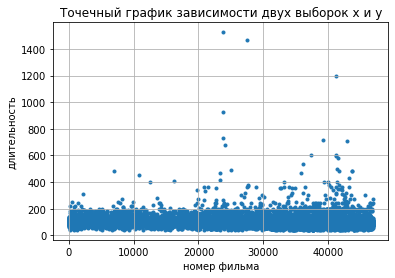

In [42]:
x = [i for i in range(0, len(duration)-1)]
y = df.loc[df['duration'] < 5000, 'duration']

plt.xlabel('номер фильма')
plt.ylabel('длительность')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='.')
plt.show()

In [4]:
df[duration > 5000]

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
27639,35647,Farscape,1999,Adventure,5280,United States,"Geoff Bennett, Tony Tilse, Ian Watson","Ben Browder, Virginia Hey, Wayne Pigram, Claud...",8.0,1


Фильм, продолжительность которого составляет более 5000 секунд:

In [5]:
df.loc[df['duration'] > 5000]

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
27639,35647,Farscape,1999,Adventure,5280,United States,"Geoff Bennett, Tony Tilse, Ian Watson","Ben Browder, Virginia Hey, Wayne Pigram, Claud...",8.0,1


Оказывается, что "Farscape" - австралийско-американский фантастический телевизионный сериал. Всего в данном сериале 90 серий. 

# Коррелляция

Взаимосвязь двух выборок друг от друга. Чтобы графически увидеть взаимосвязь двух переменных, необходимо построить точечный график зависимости друг от друга. Например, возьмер 2 параметра - duration и votes. Зависит ли средняя оценка фильма от того, насколько долго он идет?

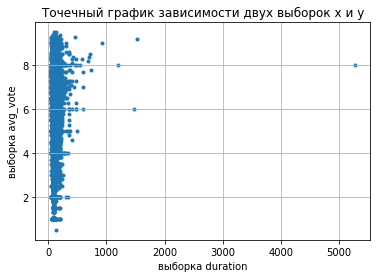

In [43]:
duration = df['duration']
avg_vote = df['avg_vote']
plt.xlabel('выборка duration')
plt.ylabel('выборка avg_vote')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(duration, avg_vote, marker='.')

In [7]:
df.drop(27639)[27638:27640]

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
27638,35645,High Noon,2000,Western,88,United States,Rod Hardy,"Tom Skerritt, Suzanna Thompson, Maria Conchita...",6.0,1
27640,35650,Animal Farm,1999,Comedy,91,United States,John Stephenson,"Pete Postlethwaite, Alan Stanford, Caroline Gr...",4.0,1


In [8]:
df[df.filmtv_ID != 27639]

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,28
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",7.0,3
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,10
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin",7.1,14
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,12
...,...,...,...,...,...,...,...,...,...,...
46902,162511,Clowntergeist,2017,Horror,80,United States,Aaron Mirtes,"Aaron Mirtes, Brittany Belland, Monica Baker, ...",6.0,1
46903,162533,Vampirella,1996,Action,82,United States,Jim Wynorski,"Talisa Soto, Roger Daltrey, Richard Joseph Pau...",5.0,1
46904,162711,Circus of the Dead,2017,Action,102,United States,Billy 'Bloody Bill' Pon,"Bill Oberst Jr., Parrish Randall, Chanel Ryan,...",8.0,1
46905,162713,Fear of Clowns,2004,Horror,106,United States,Kevin Kangas,"Rick Ganz, Jacqueline Reres, Mark Lassise, Car...",2.0,1


Удалим фильм под номером 35647 - сериал "Farscape", так как он явно является нестандартом для данной выборки. 

In [ ]:
df = df.loc[df['filmtv_ID']!=35647, :]

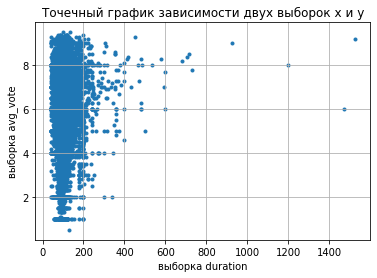

In [71]:
duration = df['duration']
avg_vote = df['avg_vote']
plt.xlabel('выборка duration')
plt.ylabel('выборка avg_vote')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(duration, avg_vote, marker='.')

In [ ]:
df[['duration', 'avg_vote']].corr()

**Выводы по графику** - чем длиннее фильм, тем выше у данного фильма оценка.

По данному графику можно заметить, что чем короткие фильмы имеют разные оценки - как низкие, так и высокие. Фильмы средней и большой длины имеют тенденция получать высокие оценки. Таким образом, между двумя выборками мы можем увидеть сильную коррелляцию.

# Нормальное распределение

**Посмотрим как выглядит нормальное распределение на практике**. Возьмем табличное значение avg_vote - среднее значение голосов за данный фильм. Посмотрим график распределения данной величины.

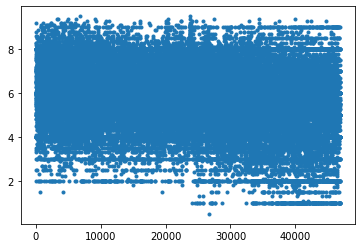

In [72]:
len_column = len(df['avg_vote']) # сколько значений в колонке
# генерируем значения от 0 до len_column 
x = np.linspace(0, len_column, len_column)
plt.scatter(x, df['avg_vote'], marker='.')

array([[<AxesSubplot:title={'center':'avg_vote'}>]], dtype=object)

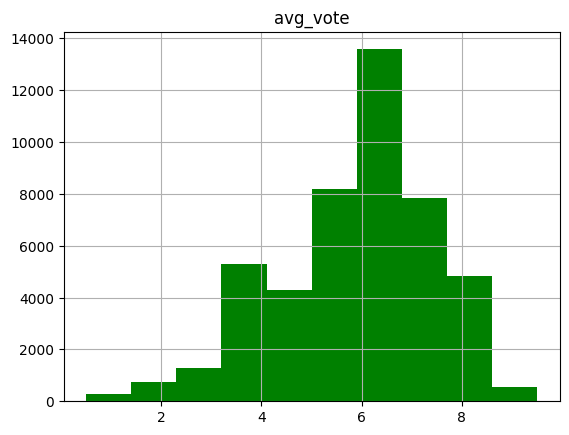

In [36]:
df[['avg_vote']].hist(bins=10, facecolor='g')

In [31]:
from scipy import stats


In [38]:
df.avg_vote.unique().__len__()

86

In [48]:
import statsmodels.api

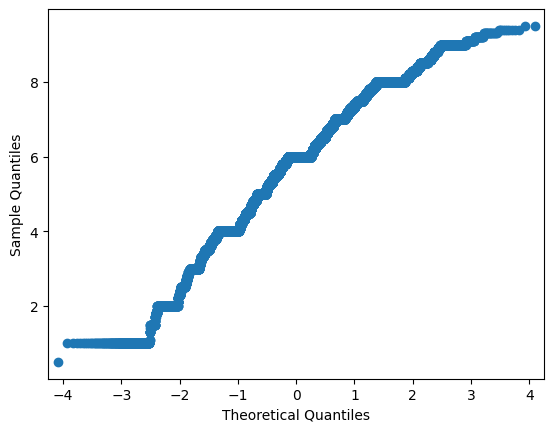

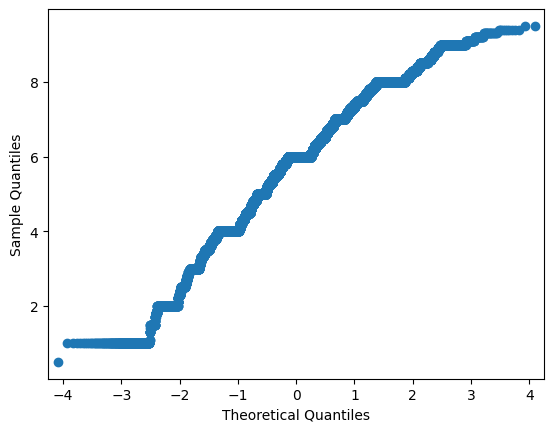

In [55]:
sm.qqplot(df.avg_vote)

По такому графику сложно понять, какое это распределение. Построим частотный график значений. 

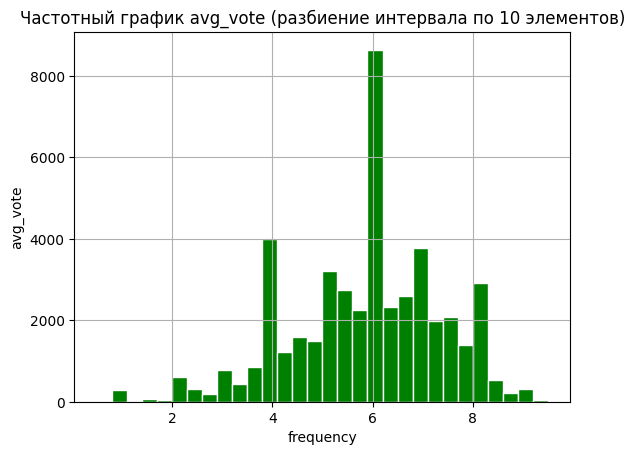

In [46]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['avg_vote'], 30, facecolor='g', edgecolor='white')

plt.xlabel('frequency')
plt.ylabel('avg_vote')
plt.title('Частотный график avg_vote (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Частотный график схож с нормальным распределением с некоторыми отклонениями. Мы можем поменять количество разбиений наших значений с 10 на 100:

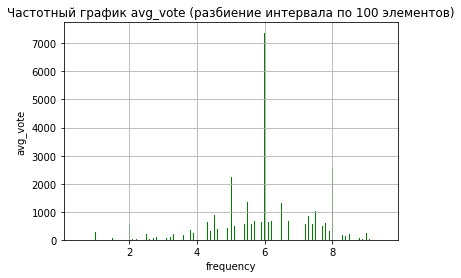

In [77]:
n, bins, patches = plt.hist(df['avg_vote'], 500, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('avg_vote')
plt.title('Частотный график avg_vote (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

In [73]:
mu = 10
sigma = 9
amount = 1000

In [ ]:
norm1 = sts.norm(loc = mu, scale = 9)
x = np.linspace(-3, 3, 1000)
y = norm1.rvs(size=amount)
plt.plot(x, y)


((array([-4.1768769 , -3.97044958, -3.85788088, ...,  3.85788088,
          3.97044958,  4.1768769 ]),
  array([0.5, 1. , 1. , ..., 9.4, 9.5, 9.5])),
 (1.4796616857824036, 5.811269106956317, 0.9891029664136815))

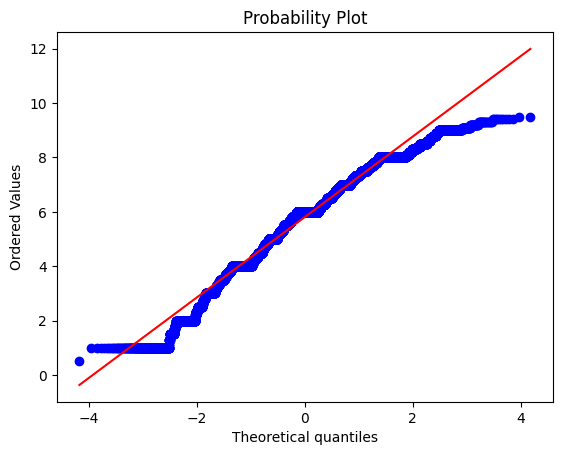

In [123]:
x = np.linspace(-30, 30, 1000)
sy = sts.norm(loc=0, scale=10).rvs(1000)
y = sts.norm(loc=0, scale=10).pdf(x)
# plt.plot(x,y)
sts.probplot(df.avg_vote, plot=plt)


In [87]:
10 / 1000**0.5

0.31622776601683794

In [125]:
mu1 = 90
sigma1 = 10

mu2 = 10 
sigma2 = 5

amount = 1000

In [126]:
y1= sts.norm(loc=mu1, scale=sigma1).rvs(1000)
y2= sts.norm(loc=mu2, scale=sigma2).rvs(1000)

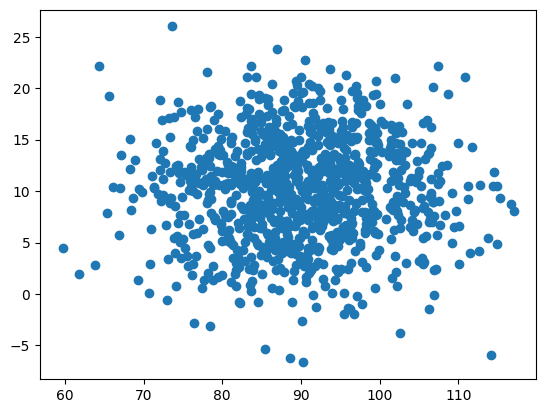

In [135]:
x = np.linspace(-100, 100, 1000)
plt.scatter(y1, y2)

In [ ]:
sts.probplot(y1, plot=plt)
sts.probplot(y2, plot=plt)

Можно заметить, что у фильмов больше всего оценок 6 (всего таких фильмов со средней оценкой 6 более 7000)

**Зададим нормальное распределение теоритически.**

Зададим 2 выборки с нормальным распределением и построим точечный график зависимости двух переменных друг от друга.
Параметр ```loc``` задаёт $\mu$ или среднее значение, ```scale``` — среднеквадратичное отклонение $\sigma$, ```size``` — размер выборки. Имя параметра ```size``` при вызове функции ```rvs``` можно не писать.


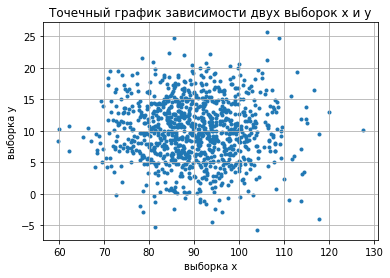

In [78]:
mu1 = 90
sigma1 = 10

mu2 = 10 
sigma2 = 5

amount = 1000

# зададим 2 нормально распределенные случайные величины
norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2)

# сгенерируем 1000 значений
x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)

# построим точечный график зависимости двух переменных

plt.xlabel('выборка x')
plt.ylabel('выборка y')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='.')

Частотный график выборки y  (или график плотности вероятности).

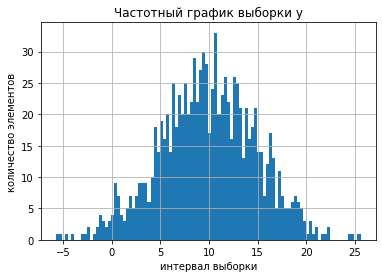

In [79]:
plt.hist(y,100)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки y')
plt.grid(True)
plt.show()

In [152]:
mu, sigma = 0, 0.1
x = np.random.normal(mu, sigma, 1000)

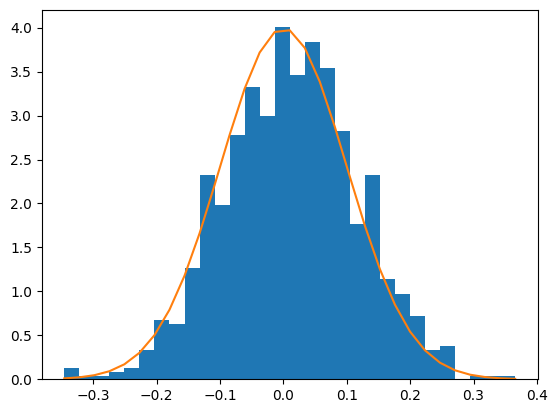

In [163]:
_, bins, _ = plt.hist(x, bins=30, density=True)
f = (1 / (sigma * ((np.pi * 2)**0.5))) * np.exp(-(bins - mu)**2 / (2 * sigma * sigma))
plt.plot(bins, f)
# plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
#                np.exp( - (bins - mu)**2 / (2 * sigma**2) ), 
#          linewidth=2, color='r')

In [172]:
tdf = df.avg_vote.value_counts().to_frame().rename(columns={'avg_vote' : "cnt_votes"})



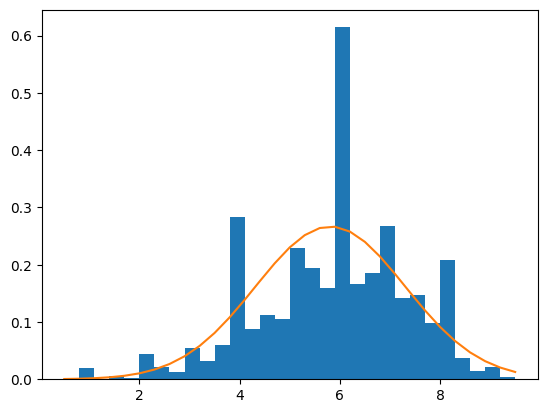

In [32]:
mu = df.avg_vote.mean()
std = df.avg_vote.std()
_, bins, _ = plt.hist(df.avg_vote, bins=30, density=True)
pdf = sts.norm(loc=mu, scale=std).pdf(bins)
plt.plot(bins, pdf)

In [41]:
mu = df.avg_vote.mean()
std = df.avg_vote.std()
mu, std
pdf = sts.norm(loc=0, scale=std).pdf(df.avg_vote)



In [ ]:
plt.hist(df.avg_vote, density=True)
plt.plot(df.avg_vote, 

In [ ]:
tdf['pdf'] = pdf
plt.scatter(tdf.index.to_list(), pdf)

In [44]:
sts.normaltest((df.avg_vote - mu) / std)

NormaltestResult(statistic=1464.904857237222, pvalue=0.0)

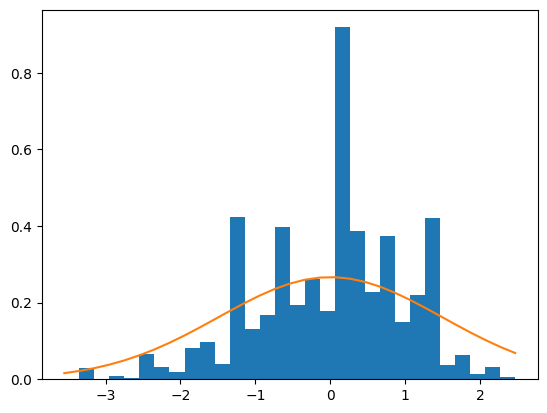

In [46]:
avg_normalized = (df.avg_vote - mu)  / std
_, bins, _ = plt.hist(avg_normalized, bins=30, density=True)
pdf = sts.norm(loc=0, scale=std).pdf(bins)
plt.plot(bins, pdf)

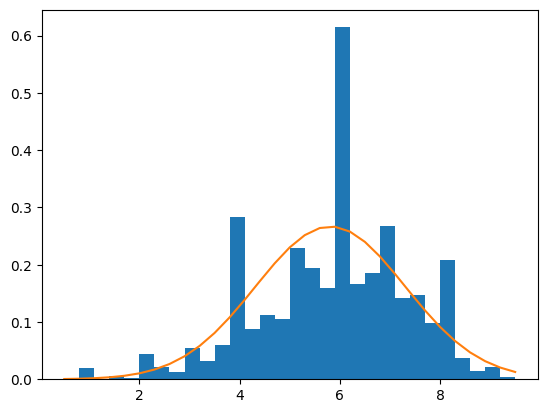

In [39]:
_, bins, _ = plt.hist(df.avg_vote, bins=30, density=True)
f = (1 / (std * ((np.pi * 2)**0.5))) * np.exp(-(bins - mu)**2 / (2 * std * std))
plt.plot(bins, f)

In [35]:
import seaborn as sns


In [33]:
import scipy.stats as sps

((array([-4.1768769 , -3.97044958, -3.85788088, ...,  3.85788088,
          3.97044958,  4.1768769 ]),
  array([0.5, 1. , 1. , ..., 9.4, 9.5, 9.5])),
 (1.4796616857824036, 5.811269106956317, 0.9891029664136815))

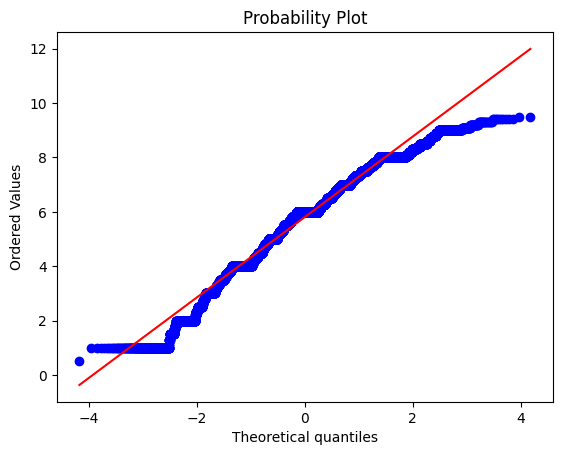

In [37]:
sps.probplot(df.avg_vote, plot=plt)

2-ой способ теоритической генерации нормального распределения: модуль random. 

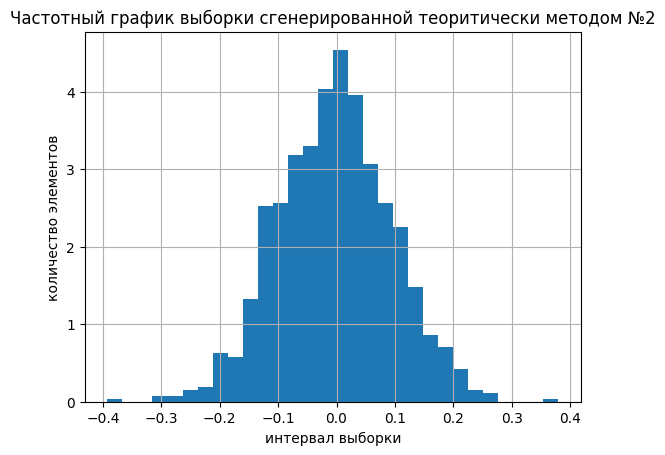

In [162]:
mu, sigma = 0, 0.1 # среднее значение и дисперсия
s = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 30, density=True)
# bins - разбиение интервала
# формула плотности распределения Гаусса
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ), 
         linewidth=2, color='r')
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки сгенерированной теоритически методом №2')
plt.grid(True)
plt.show()

А так можно вычислить значение функции плотности вероятности нормального распределения в заданной точке:

In [81]:
norm_rv1.pdf(3)

1.4622963575006582e-18

Построим графики функции плотности вероятности от различных выборок (с разными параметрами):

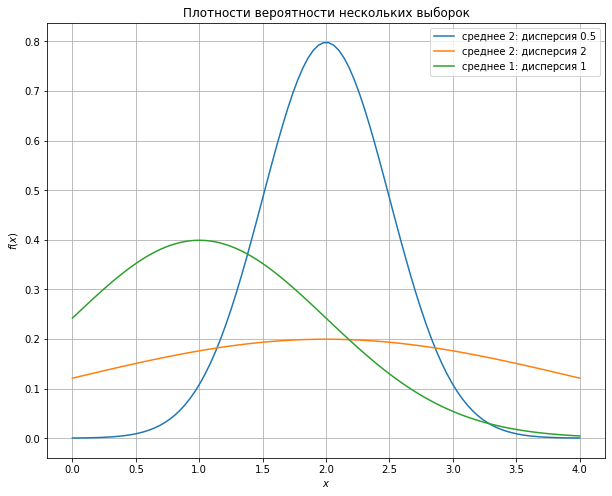

In [82]:
# зададим нормально распределенную случайную величину для нескольких выборок
norm_rv = sts.norm(loc=2, scale=0.5)
norm_rv2 = sts.norm(2, 0.1)
norm_rv3 = sts.norm(2, 2)
norm_rv4 = sts.norm(1, 1)

# зададим вектор x от 0 до 4 с шагом 100 для отрисовки результата
x = np.linspace(0,4,100) 
pdf = norm_rv.pdf(x)
pdf2 = norm_rv2.pdf(x)
pdf3 = norm_rv3.pdf(x)
pdf4 = norm_rv4.pdf(x)
plt.figure(figsize=(10,8))
plt.plot(x, pdf)
plt.plot(x, pdf3)
plt.plot(x, pdf4)

plt.legend(['среднее 2: дисперсия 0.5',  'среднее 2: дисперсия 2', 'среднее 1: дисперсия 1'])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('Плотности вероятности нескольких выборок')
plt.grid(True)

# Равномерное распределение на отрезке

Равномерное распределение на практике - это числа идущие последовательно от 0 до целого числа N. В равномерной выборке каждый элемент встречается одинаковое число раз.

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

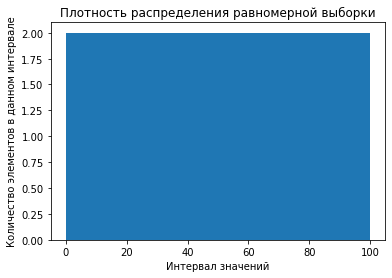

In [83]:
x = np.linspace(0, 100, 100)

plt.ylabel('Количество элементов в данном интервале')
plt.xlabel('Интервал значений')
plt.title('Плотность распределения равномерной выборки')
plt.hist(x, 50)
plt.show()

Сгенерируем теоритически выборку из случайной величины, имеющей равномерное распределение на отрезке $[a,b]$:

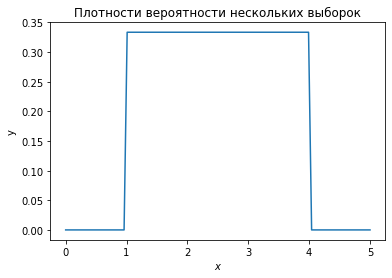

In [84]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

# сгенерируем вектор x для отрисовки значения в pyplot.plot()
x = np.linspace(0, 5, 100)
pdf = uniform_rv.pdf(x)

plt.ylabel('y')
plt.xlabel('$x$')
plt.title('Плотности вероятности нескольких выборок')
plt.plot(x, pdf)

# Нормализация данных

Операция центрирования

In [51]:
duration = df['duration']
print(statistics.mean(duration))

99.23111689086916


Так как среднее значение не равно 0, необходимо нормализовать.

In [52]:
duration_1 = duration - statistics.mean(duration)
print(statistics.mean(duration_1))

6.817162743332029e-15


Масштабирование выборки

Разброс данных приводим к виду (0,1)  либо (-1,1)

In [87]:
min(duration_1)

-59.120666865646186

In [88]:
max(duration_1)

1425.8793331343538

In [82]:
ar = np.array([1,2,3,4,5,6,7,8])
ar.reshape(1, -1)

array([[1, 2, 3, 4, 5, 6, 7, 8]])

In [58]:
duration_1.values.reshape()

array([-23.23111689,  -1.23111689,  -8.23111689, ...,   2.76888311,
         6.76888311, -34.23111689])

In [83]:
import sklearn.preprocessing as sklp
scaler = sklp.MinMaxScaler((-1, 1))
duration_2 = scaler.fit_transform(duration_1.values.reshape(-1, 1))
print(min(duration_2))
print(max(duration_2))

[-1.]
[1.]


In [89]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

duration_2 = min_max_scaler.fit_transform(np.array(duration_1).reshape(-1, 1))
print(min(duration_2))
print(max(duration_2))

[-1.]
[1.]


In [ ]:
x = [1, 2, 3, 4, 5]
print(sum(x) / len(x))
y = [3, 4, 6, 8, 10]
print(sum(y) / len(y))
sps.pearsonr(x, y)
plt.scatter(x,y)

# Корелляция Пирсона

1.0


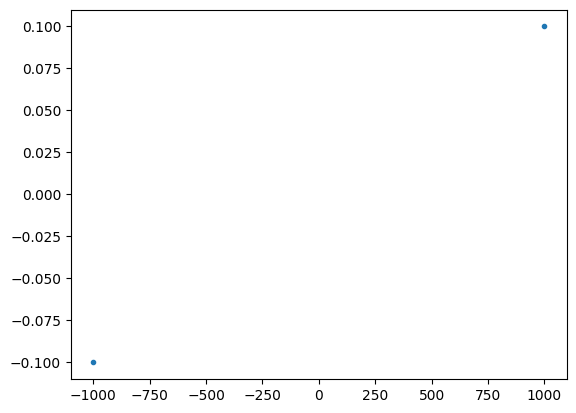

In [18]:
from scipy.stats import pearsonr
x = [-1000, 1000]
y = [-0.1, 0.1]

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print(corr)

Чтобы приступать к расчетам коэффициента корреляции r-Пирсона необходимо выполнение следующих условий:

*  Исследуемые переменные X и Y должны быть распределены нормально (делаем допущение, что переменные распределены нормально).
*  Исследуемые переменные X и Y должны быть измерены в интервальной шкале или шкале отношений.
*  Количество значений в исследуемых переменных X и Y должно быть одинаковым.

Чем коэффициент ближе к 0, тем более независимы переменные.

In [92]:
corr, p_value = pearsonr(duration, avg_vote)
print(corr)

0.1111789114478769


**Минусы коэффициента корреляции Пирсона:**
- Неустойчивость к выбросам.
- С помощью коэффициента корреляции Пирсона можно определить только силу линейной взаимосвязи между переменными, другие виды взаимосвязей выявляются методами регрессионного анализа.

# Пример корелляции данных, загруженных с помощью pandas

Загружаем данные о ценах на авокадо в США

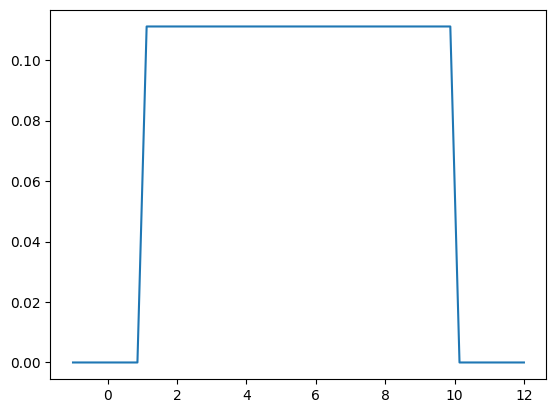

In [27]:
import numpy as np
a = 1
b = 10
uni = sps.uniform(a, b-a)
rvs = uni.rvs(100)
x = np.linspace(-1, 12)
plt.plot(x, uni.pdf(x))
pass
# plt.show()

In [28]:
x.var()

14.658163265306126

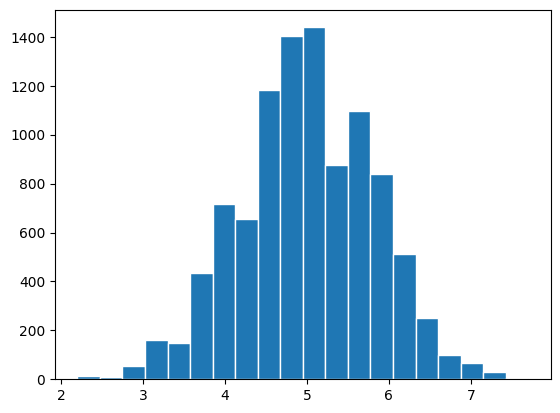

In [45]:
y = []
for _ in range(10000):
    s = np.random.randint(1, 10, 10)
    y.append(sum(s)/ len(s))
plt.hist(y, ec='white', bins=20)
pass

In [3]:
import io
# import requests
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
url="avocado.csv"
df=pd.read_csv(url)

Данные представляют собой time-series data, или временной ряд. В каждый из дней даны такие показатели, как:


*   Date - день показания
*   AveragePrice - средняя цена на один авокадо (авокадо продаются обычно в брикетах по несколько штук)
*   Total Volume - сколько всего было куплено авокадо
*   4046 - общее количество авокадо с кодом 4046
*   4225 - общее количество авокадо с кодом 4225
*   4770 - общее количество авокадо с кодом 4770
*   Total Bags - количество проданных брикетов всего
*   Small Bags - количество проданных малых брикетов
*   Large Bags - количество проданных больших брикетов
*   XLarge Bags - количество проданных XLarge брикетов
*   type - conventional или organic
*   year - год продажи
*   region - регион показаний




Более подробно можно почитать о датасете цен на авокадо: https://www.kaggle.com/neuromusic/avocado-prices

Печатаем 5 значений

In [46]:
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


Размер выборки:

<AxesSubplot:xlabel='Total Volume', ylabel='Total Bags'>

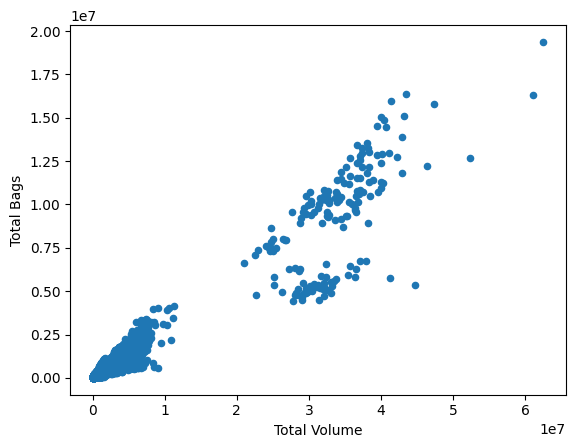

In [62]:
df.plot.scatter(x='Total Volume', y='Total Bags')

In [48]:
import sklearn.preprocessing
scaler = sklearn.preprocessing.MinMaxScaler((0, 1))

In [59]:
vb = scaler.fit_transform(df[['Total Volume', 'Total Bags']])
df_norm = pd.DataFrame(vb, columns=['t_vol', 't_bags'])
df_norm.head()

,t_vol,t_bags
0,0.001026,0.000449
1,0.000877,0.000491
2,0.001890,0.000420
3,0.001262,0.000300
4,0.000815,0.000319


In [70]:
vb[:5]

array([[0.00102634, 0.00044891],
       [0.0008766 , 0.00049066],
       [0.00189   , 0.00042045],
       [0.00126241, 0.00029996],
       [0.00081521, 0.0003192 ]])

<AxesSubplot:xlabel='t_vol', ylabel='t_bags'>

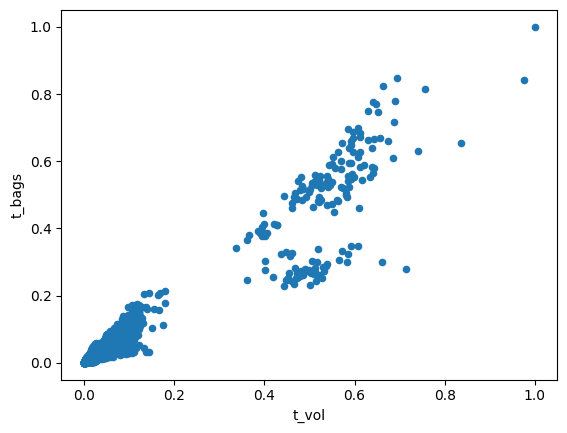

In [60]:
df_norm.plot.scatter(x='t_vol', y='t_bags')

Нормализация значений

In [64]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['Total Volume', 'Total Bags']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0  0.001026  0.000449
1  0.000877  0.000491
2  0.001890  0.000420
3  0.001262  0.000300
4  0.000815  0.000319


Корелляция скорее всего между Total Volume и Total Bags 

(array([1.7905e+04, 1.7000e+02, 4.3000e+01, 2.3000e+01, 2.5000e+01,
        4.8000e+01, 2.4000e+01, 6.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

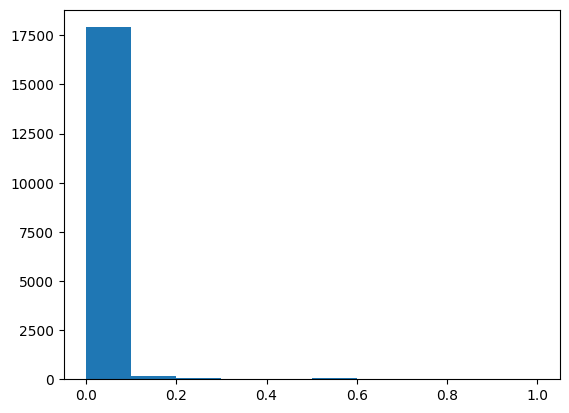

In [68]:
volume = df_norm[0]
bags = df_norm[1]
plt.hist(bags)

Посмотрим насколько они зависят друг от друга:

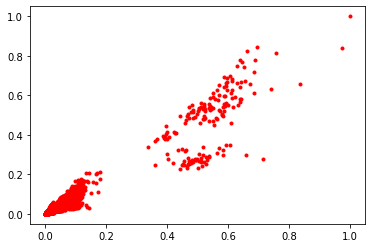

In [111]:
plt.plot(volume, bags, 'r.')
plt.show()

In [93]:

tdf = df.reindex(columns=['4046', '4225', '4770']).rename(columns={'4046' : 'a', '4225' : 'b', '4770' : 'c'}).head()
tdf

,a,b,c
0,1036.74,54454.85,48.16
1,674.28,44638.81,58.33
2,794.70,109149.67,130.50
3,1132.00,71976.41,72.58
4,941.48,43838.39,75.78


In [97]:
tdf.apply(sum).to_frame()

,0
a,4579.20
b,324058.13
c,385.35


In [79]:
sps.pearsonr(volume, bags)

(0.9630470824267292, 0.0)

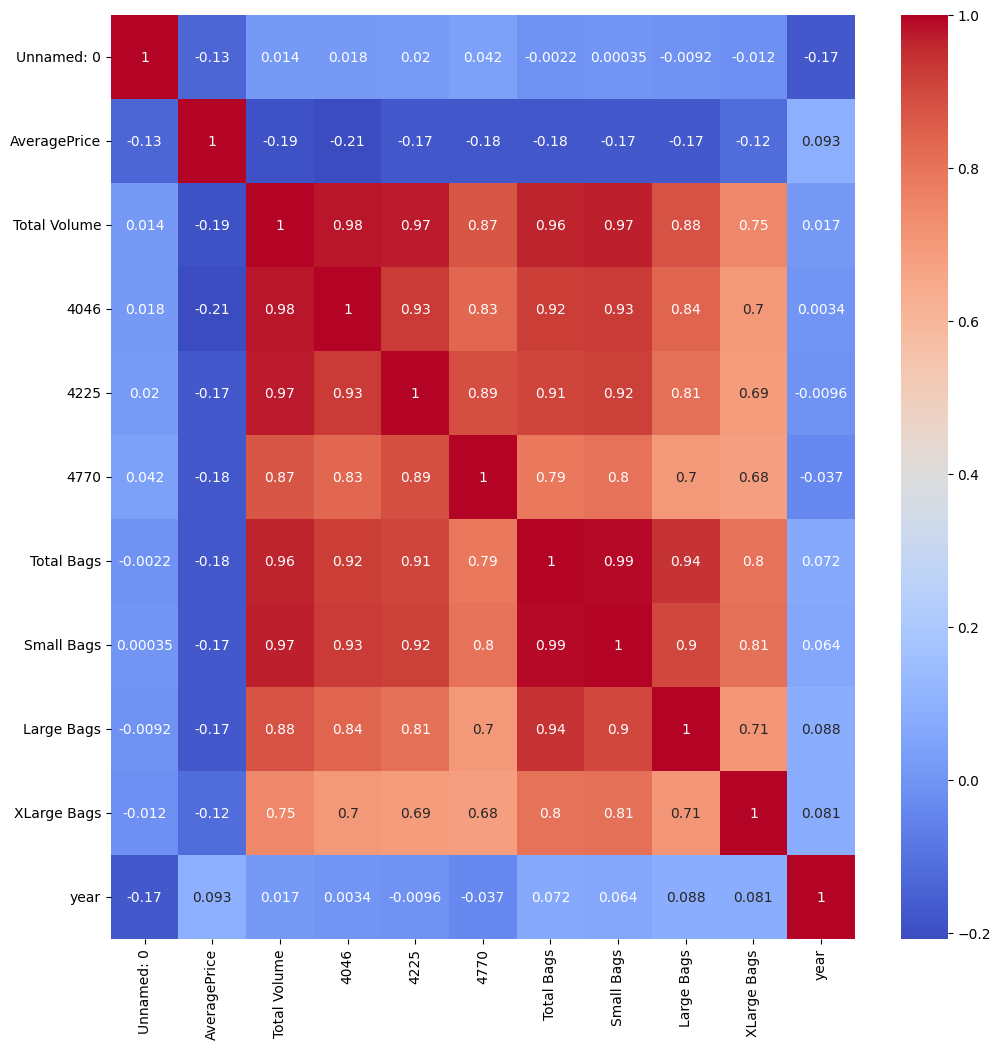

In [98]:
import seaborn as sns
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
figure = plt.gcf()
figure.set_size_inches(12, 12)

In [112]:
corr, p_value = pearsonr(volume, bags)
print(corr)

0.9630470824267293


Полный список функций SciPy для работы со всеми распределениями можно найти тут: http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html

Матрица корреляций.

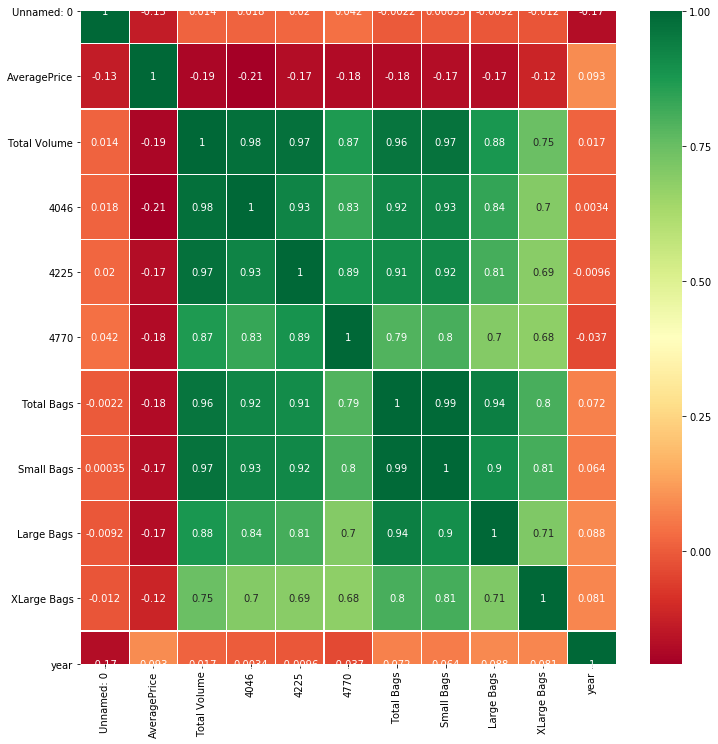

In [113]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()


In [99]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

In [114]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [103]:
df[df.type == 'conventional'].groupby('region')

В выборке имеется два вида авокадо: промышленный и органический. Выберем промышленный авокадо для анализа.

In [105]:
PREDICTION_TYPE = 'conventional'
df_conv = df[df.type == PREDICTION_TYPE]

In [ ]:
regions = df_conv.groupby(df_conv.region)
print("Всего регионов в выборке :", len(regions))
print("-------------")
for name, group in regions:
    print(name, " : ", len(group))

In [114]:
rg = regions.get_group('TotalUS')[['Date', 'AveragePrice']]

<AxesSubplot:xlabel='Date'>

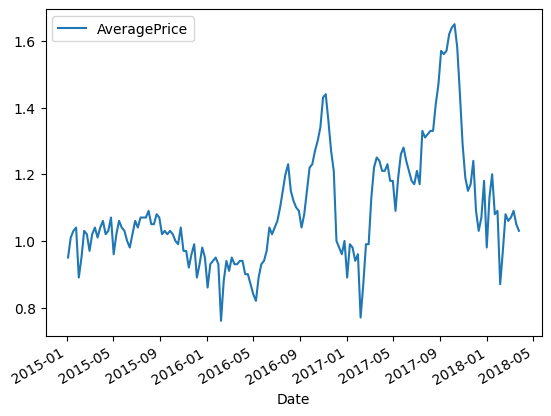

In [115]:
rg.plot.line(x='Date', y='AveragePrice')

У нас есть задание проанализировать рынок для определенного региона: TotalUS.

In [ ]:
PREDICTING_FOR = "TotalUS"
date_price = regions.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)
date_price

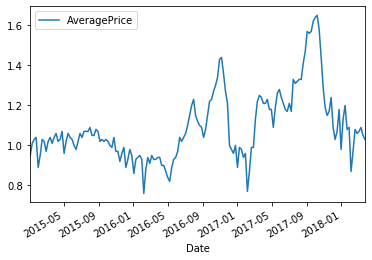

In [180]:
date_price.plot(x='Date', y='AveragePrice', kind="line")

In [116]:
date_price.rename(columns={"Date" : 'ds', 'AveragePrice' : 'y'})

,ds,y
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99
...,...,...
164,2018-02-04,0.87
165,2018-01-28,1.09
166,2018-01-21,1.08
167,2018-01-14,1.20


Итак, у нас есть исторические данные, и мы хотим предсказать на их основе, как будет меняться цена в будущем. Для этого можно использовать разные методы. Допустим, мы хотим реализовать имеющийся инструмент - [Prophet](https://facebook.github.io/prophet/docs/quick_start.html)

Во-первых, переименуем столбцы как того требует prophet.

In [117]:
date_price = date_price.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [126]:
date_price.sort_values(by='y', inplace=True)

In [121]:
amount_80 = int(len(date_price) * 0.8)
amount_80
train_price = date_price[:amount_80]
test_price = date_price[amount_80:]

Во-вторых, разделим данные на 80% тренировочных и на 20% тестовых:

In [ ]:
date_price = date_price.sort_values(by='ds')

In [ ]:
amount_80 = int(len(date_price)*0.8)
train_price = date_price[:amount_80]
test_price = date_price[amount_80:]


In [127]:
train_price.head()

,ds,y
98,2016-02-07,0.76
151,2017-02-05,0.77
85,2016-05-08,0.82
86,2016-05-01,0.84
103,2016-01-03,0.86


In [128]:
train_price.tail()

,ds,y
56,2016-11-27,1.21
130,2017-07-02,1.21
133,2017-06-11,1.21
143,2017-04-02,1.21
142,2017-04-09,1.21


In [129]:
test_price.head()

,ds,y
146,2017-03-12,1.22
65,2016-09-25,1.22
64,2016-10-02,1.23
73,2016-07-31,1.23
141,2017-04-16,1.23


In [203]:
test_price.tail()

,ds,y
161,2018-02-25,1.06
160,2018-03-04,1.07
159,2018-03-11,1.09
158,2018-03-18,1.05
157,2018-03-25,1.03


В-третьих, обучим модель:

In [204]:
from fbprophet import Prophet
m = Prophet()
m.fit(train_price)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Сделаем предсказания для тестового периода:

Посчитаем, насколько дней вперед надо сделать предсказания

In [135]:
train_price.ds.iloc[-1] - test_price.ds.iloc[-1]

Timedelta('-182 days +00:00:00')

In [ ]:
train_price

In [133]:
train_price.tail()

,ds,y
56,2016-11-27,1.21
130,2017-07-02,1.21
133,2017-06-11,1.21
143,2017-04-02,1.21
142,2017-04-09,1.21


In [134]:
test_price.tail()

,ds,y
121,2017-09-03,1.57
115,2017-10-15,1.58
118,2017-09-24,1.62
117,2017-10-01,1.64
116,2017-10-08,1.65


Последний день тренировочных данных - это 30 июля 2017. Последний день тестовых данных - это 25 марта 2018. Нам нужно сделать предсказания на примерно 240 дней вперед.

In [ ]:
future = m.make_future_dataframe(periods=240)
forecast = m.predict(future)

In [208]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.091091,0.899190,1.071263,1.091091,1.091091,-0.111321,-0.111321,-0.111321,-0.111321,-0.111321,-0.111321,0.0,0.0,0.0,0.979770
1,2015-01-11,1.088003,0.911099,1.086507,1.088003,1.088003,-0.093034,-0.093034,-0.093034,-0.093034,-0.093034,-0.093034,0.0,0.0,0.0,0.994969
2,2015-01-18,1.084915,0.914144,1.077757,1.084915,1.084915,-0.087826,-0.087826,-0.087826,-0.087826,-0.087826,-0.087826,0.0,0.0,0.0,0.997089
3,2015-01-25,1.081827,0.884693,1.052431,1.081827,1.081827,-0.112888,-0.112888,-0.112888,-0.112888,-0.112888,-0.112888,0.0,0.0,0.0,0.968939
4,2015-02-01,1.078739,0.840428,1.007727,1.078739,1.078739,-0.156223,-0.156223,-0.156223,-0.156223,-0.156223,-0.156223,0.0,0.0,0.0,0.922516


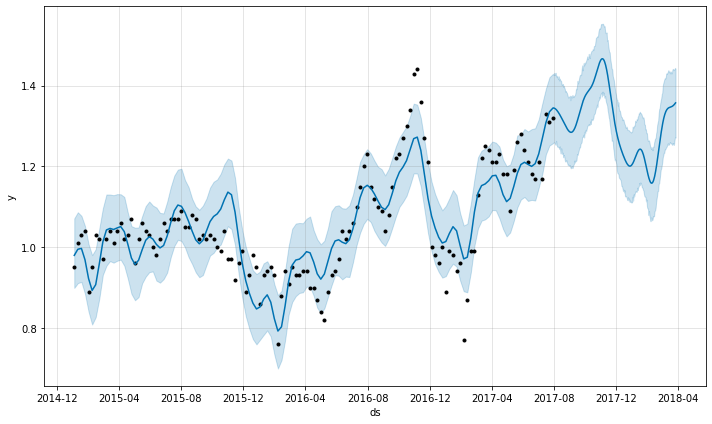

In [209]:
fig1 = m.plot(forecast)

Сравним с тем, что было на самом деле в этот период:

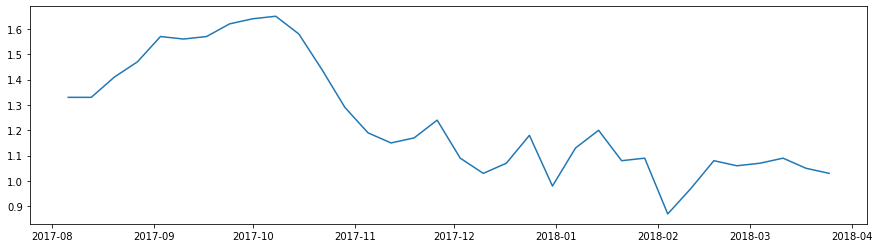

In [213]:
plt.figure(figsize=(15,4))
plt.plot(test_price['ds'], test_price['y'])
plt.show()

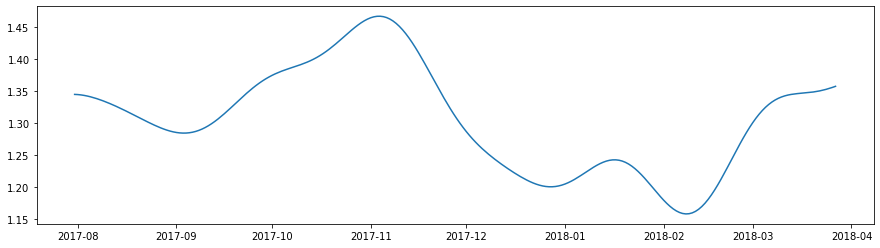

In [223]:
plt.figure(figsize=(15,4))
forecast_future = forecast.iloc[135:,:]
plt.plot(forecast_future['ds'], forecast_future['yhat'])
plt.show()

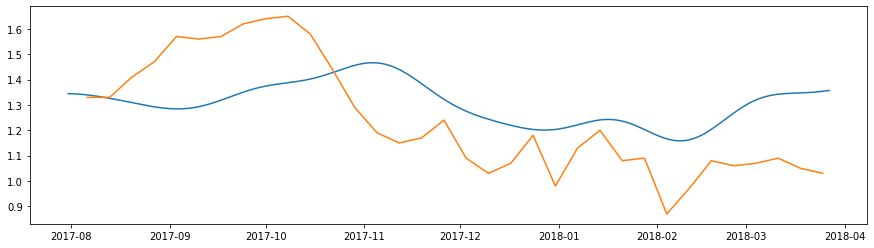

In [224]:
plt.figure(figsize=(15,4))
forecast_future = forecast.iloc[135:,:]
plt.plot(forecast_future['ds'], forecast_future['yhat'])
plt.plot(test_price['ds'], test_price['y'])
plt.show()

Модель не совсем точна, но есть некая корреляция между данными.

Можно посчитать среднюю ошибку модели. 